<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Reading-In-Data" data-toc-modified-id="Reading-In-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading In Data</a></span></li><li><span><a href="#Analyzing-Data" data-toc-modified-id="Analyzing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyzing Data</a></span><ul class="toc-item"><li><span><a href="#High-Level-.describe()" data-toc-modified-id="High-Level-.describe()-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>High Level .describe()</a></span></li><li><span><a href="#Top-N-by-F1_real-and-F1_fake" data-toc-modified-id="Top-N-by-F1_real-and-F1_fake-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Top-N by F1_real and F1_fake</a></span><ul class="toc-item"><li><span><a href="#Paper-Table-for-Top-10-by-F1_real" data-toc-modified-id="Paper-Table-for-Top-10-by-F1_real-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Paper Table for Top 10 by F1_real</a></span></li><li><span><a href="#Paper-Table-for-Top-10-by-F1_fake" data-toc-modified-id="Paper-Table-for-Top-10-by-F1_fake-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Paper Table for Top 10 by F1_fake</a></span></li><li><span><a href="#Paper-Table-for-Top-by-Both--F1_fake-and-F1_real" data-toc-modified-id="Paper-Table-for-Top-by-Both--F1_fake-and-F1_real-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Paper Table for Top by Both  F1_fake and F1_real</a></span></li></ul></li><li><span><a href="#Now-lets-create-a-filter" data-toc-modified-id="Now-lets-create-a-filter-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Now lets create a filter</a></span></li><li><span><a href="#Finding-Maximum-CV-ROC-by-weight-scheme" data-toc-modified-id="Finding-Maximum-CV-ROC-by-weight-scheme-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Finding Maximum CV-ROC by weight scheme</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Plotting-Analysis-of-Feature-N-gram-Sizes--(!!!-REWORK-IN-1-PLOT)" data-toc-modified-id="Plotting-Analysis-of-Feature-N-gram-Sizes--(!!!-REWORK-IN-1-PLOT)-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Plotting Analysis of Feature N-gram Sizes  (!!! REWORK IN 1 PLOT)</a></span></li><li><span><a href="#Plotting-Analysis-of-Weighting-Schemes" data-toc-modified-id="Plotting-Analysis-of-Weighting-Schemes-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Plotting Analysis of Weighting Schemes</a></span></li><li><span><a href="#Plotting-Analysis-of-Classifiers!!!" data-toc-modified-id="Plotting-Analysis-of-Classifiers!!!-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Plotting Analysis of Classifiers!!!</a></span></li></ul></li><li><span><a href="#ROC-curve-plots" data-toc-modified-id="ROC-curve-plots-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>ROC-curve plots</a></span><ul class="toc-item"><li><span><a href="#RUN-FROM-HERE-TO-CREATE-ROC-PLOTS" data-toc-modified-id="RUN-FROM-HERE-TO-CREATE-ROC-PLOTS-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>RUN FROM HERE TO CREATE ROC PLOTS</a></span></li></ul></li></ul></li></ul></div>

## Summary 

In this notebook we need to analyze the received experimental data and arrive to some ineteresting results and explanations that we'll add to the paper 

The metrics to consider for any analysis: 

 * "best" by ROC on CV and/or test (sometimes ROC si ste to 0 or -1 as an error, you should ignore those results)
 * another way to consider is "best" by F1: we have F1_fake and F1-real separately (more interetsed in fake actually but better to analyzie for both - see how Veronica and Rada did it in their paper).


What we might want to learn: 

* which experiment is the best overall?  

* which weight scheme gave the best results more frequently?  That is, may be the best weighting scheme. 
    
* which classifier performed better?  

* which feature combinations are better to use? 

* what are the feature vector sizes for what combinations? Any characteristics for those. Which potentially overfit and cannot be used on our dataset?   (might be useful in the future for larger datasets) 

* ... so on

As the result of ths investigatin you should be able to  provide the following recommenation to the reader (very rough sample): 

we prepared this dataset for the Urdu language. Urdu doesn't have such tools as other languages that's why we didn't use the fancy features as in (Veronica and Rada, 2018) yet we tried to provide a baseline classifier and recommend the best set of readily available feature, i.e., N-grams of different types, as well as analyzed various hyperparameters such as weighting schemes for those features. We've tried our experiments using a number of popular and available classifiers and  found out that: 

* the best result was with such  n-gram combination - weighting scheme - classifier  (actually, by 2 or 3 metrics, we might get a few "bests")
* the overall consistently strongly performing weighting scheme is .... 
    * (also, logent and rela give aweful times but it might be because they are manually written by us - we'll see whether to add this) 
 
* the recommended classifier is.. 

* the promising n-gram combinations are ... (we need to exclude the combinatios with overly large feature #)



In [1]:
# IGNORE THIS: needed to make it run on Alisa's laptop 
import sys 
#sys.executable, sys.path
sys.path.append('/Users/alisa/workspace/Urdu_Fake_News/envname/lib/python3.7/site-packages')

In [2]:
import pandas as pd 
import numpy as np
from pathlib import Path

## Reading In Data

In [3]:
results = pd.read_csv(Path('results/results.csv'))
results.shape

(2880, 16)

In [7]:
results.columns

Index(['N-gram-feat-comb', 'char N-gram', 'word N-gram', 'func N-gram',
       'total_feat_num', 'weight scheme', 'classifier', 'cv-acc',
       'cv-balanced_acc', 'cv-roc', 'cv-f1-fake', 'acc', 'balanced_acc', 'roc',
       'f1_fake', 'f1_real'],
      dtype='object')

In [8]:
results.tail(2)

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
2878,0-1-6 char-word-func,0,1,6,4038,none (tf),BernoulliNB,0.56,0.58,0.67,0.62,0.68,0.70,0.80,0.69,0.66
2879,0-1-6 char-word-func,0,1,6,4038,none (tf),AdaBoostClassifier,0.66,0.66,0.73,0.63,0.66,0.65,0.73,0.57,0.72


## Analyzing Data

### High Level .describe()

In [9]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 16 columns):
N-gram-feat-comb    2880 non-null object
char N-gram         2880 non-null int64
word N-gram         2880 non-null int64
func N-gram         2880 non-null int64
total_feat_num      2880 non-null int64
weight scheme       2880 non-null object
classifier          2880 non-null object
cv-acc              2880 non-null float64
cv-balanced_acc     2880 non-null float64
cv-roc              2880 non-null float64
cv-f1-fake          2880 non-null float64
acc                 2880 non-null float64
balanced_acc        2880 non-null float64
roc                 2880 non-null float64
f1_fake             2880 non-null float64
f1_real             2880 non-null float64
dtypes: float64(9), int64(4), object(3)
memory usage: 360.1+ KB


In [10]:
# returns a boolean series indicating which values aren't NULL
# if it show "True" -  it means this value is not null
results.notnull()

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [11]:
# returns a boolean series indicating which values aren't NULL
# if it show "False" -  it means this value is not null
# if it show "True" -  it means this value is null
results.isnull()

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
results.describe()

,char N-gram,word N-gram,func N-gram,total_feat_num,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
count,2880.000000,2880.000000,2880.000000,2880.00000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,1.600000,1.600000,1.600000,9049.80000,0.484639,0.468149,0.554896,0.291660,0.661969,0.629722,0.563872,0.425931,0.741056
std,1.925605,1.925605,1.925605,11885.41162,0.436200,0.433719,0.460627,0.460304,0.088442,0.108911,0.339367,0.296325,0.071564
min,0.000000,0.000000,0.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,0.480000,0.490000,0.000000,0.000000,0.170000
25%,0.000000,0.000000,0.000000,922.75000,0.550000,0.500000,0.590000,0.010000,0.580000,0.510000,0.382500,0.070000,0.720000
50%,1.000000,1.000000,1.000000,4079.50000,0.580000,0.570000,0.670000,0.490000,0.640000,0.630000,0.710000,0.540000,0.730000
75%,3.000000,3.000000,3.000000,9027.00000,0.650000,0.640000,0.750000,0.620000,0.730000,0.720000,0.810000,0.680000,0.790000
max,6.000000,6.000000,6.000000,41125.00000,0.830000,0.830000,0.910000,0.820000,0.870000,0.870000,0.960000,0.850000,0.900000


Notice that the first three columns are not important because these are just different N-grams. So their stats don't really matter.


Look at the results and anayze each column.   What can we tell from this very high level analysis? 
Note that values -1 and 0 for ROC are when error occured or this metric could not be applied (not all classifiers support it, do you know why?) 

No, I dont know why? Can you please explain? 

For other metrics if the value is 0, so it is. 


### Top-N by F1_real and F1_fake

In this section, we used all the parameters separatly:

(N-gram-feat-comb', 'char N-gram', 'word N-gram', 'func N-gram','total_feat_num', 'weight scheme', 'classifier', 'cv-acc','cv-balanced_acc', 'cv-roc', 'cv-f1-fake', 'acc', 'balanced_acc', 'roc','f1_fake', 'f1_real')

to find the best N gram size. 

In [13]:
# https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/
results.nlargest(10, ['f1_real']) 

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
1801,3-1-0 char-word-func,3,1,0,11947,norm,LinearSVC,0.72,0.72,0.82,0.69,0.87,0.85,0.00,0.83,0.90
152,2-2-2 char-word-func,2,2,2,11448,binary,LogisticRegression,0.78,0.78,0.87,0.75,0.86,0.84,0.93,0.81,0.89
159,2-2-2 char-word-func,2,2,2,11448,binary,AdaBoostClassifier,0.79,0.79,0.87,0.77,0.86,0.85,0.93,0.82,0.89
201,2-1-0 char-word-func,2,1,0,5575,binary,LinearSVC,0.80,0.80,0.90,0.78,0.87,0.86,0.00,0.84,0.89
1007,2-0-0 char-word-func,2,0,0,1555,norm,AdaBoostClassifier,0.79,0.79,0.87,0.77,0.87,0.86,0.93,0.84,0.89
1015,2-0-0 char-word-func,2,0,0,1555,relat,AdaBoostClassifier,-1.00,-1.00,-1.00,-1.00,0.87,0.86,0.93,0.84,0.89
1023,2-0-0 char-word-func,2,0,0,1555,none (tf),AdaBoostClassifier,0.79,0.79,0.87,0.77,0.87,0.86,0.93,0.84,0.89
1609,3-3-3 char-word-func,3,3,3,14577,norm,LinearSVC,0.74,0.73,0.82,0.71,0.86,0.84,0.00,0.81,0.89
1967,2-0-1 char-word-func,2,0,1,1848,norm,AdaBoostClassifier,0.79,0.79,0.88,0.78,0.87,0.87,0.92,0.85,0.89
1975,2-0-1 char-word-func,2,0,1,1848,relat,AdaBoostClassifier,-1.00,-1.00,-1.00,-1.00,0.87,0.87,0.92,0.85,0.89


In [14]:
results.columns

Index(['N-gram-feat-comb', 'char N-gram', 'word N-gram', 'func N-gram',
       'total_feat_num', 'weight scheme', 'classifier', 'cv-acc',
       'cv-balanced_acc', 'cv-roc', 'cv-f1-fake', 'acc', 'balanced_acc', 'roc',
       'f1_fake', 'f1_real'],
      dtype='object')

#### Paper Table for Top 10 by F1_real

In [17]:
top10_by_f1_real = results.nlargest(10, ['f1_real'])[['char N-gram', 'word N-gram', 'func N-gram',
       'total_feat_num', 'weight scheme', 'classifier', 'balanced_acc', 'roc',
       'f1_fake', 'f1_real']]

#Character N-Gram & ', & C 

In [18]:
top10_by_f1_real

,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,balanced_acc,roc,f1_fake,f1_real
1801,3,1,0,11947,norm,LinearSVC,0.85,0.00,0.83,0.90
152,2,2,2,11448,binary,LogisticRegression,0.84,0.93,0.81,0.89
159,2,2,2,11448,binary,AdaBoostClassifier,0.85,0.93,0.82,0.89
201,2,1,0,5575,binary,LinearSVC,0.86,0.00,0.84,0.89
1007,2,0,0,1555,norm,AdaBoostClassifier,0.86,0.93,0.84,0.89
1015,2,0,0,1555,relat,AdaBoostClassifier,0.86,0.93,0.84,0.89
1023,2,0,0,1555,none (tf),AdaBoostClassifier,0.86,0.93,0.84,0.89
1609,3,3,3,14577,norm,LinearSVC,0.84,0.00,0.81,0.89
1967,2,0,1,1848,norm,AdaBoostClassifier,0.87,0.92,0.85,0.89
1975,2,0,1,1848,relat,AdaBoostClassifier,0.87,0.92,0.85,0.89


In [19]:
results.nlargest(10, ['f1_fake']) 

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
1967,2-0-1 char-word-func,2,0,1,1848,norm,AdaBoostClassifier,0.79,0.79,0.88,0.78,0.87,0.87,0.92,0.85,0.89
1975,2-0-1 char-word-func,2,0,1,1848,relat,AdaBoostClassifier,-1.00,-1.00,-1.00,-1.00,0.87,0.87,0.92,0.85,0.89
1983,2-0-1 char-word-func,2,0,1,1848,none (tf),AdaBoostClassifier,0.79,0.79,0.88,0.78,0.87,0.87,0.92,0.85,0.89
201,2-1-0 char-word-func,2,1,0,5575,binary,LinearSVC,0.80,0.80,0.90,0.78,0.87,0.86,0.00,0.84,0.89
679,1-1-0 char-word-func,1,1,0,4121,logent,AdaBoostClassifier,0.76,0.76,0.85,0.75,0.87,0.86,0.94,0.84,0.88
775,1-1-0 char-word-func,1,1,0,4121,logent,AdaBoostClassifier,0.77,0.77,0.87,0.76,0.87,0.86,0.94,0.84,0.88
1007,2-0-0 char-word-func,2,0,0,1555,norm,AdaBoostClassifier,0.79,0.79,0.87,0.77,0.87,0.86,0.93,0.84,0.89
1015,2-0-0 char-word-func,2,0,0,1555,relat,AdaBoostClassifier,-1.00,-1.00,-1.00,-1.00,0.87,0.86,0.93,0.84,0.89
1023,2-0-0 char-word-func,2,0,0,1555,none (tf),AdaBoostClassifier,0.79,0.79,0.87,0.77,0.87,0.86,0.93,0.84,0.89
157,2-2-2 char-word-func,2,2,2,11448,binary,MultinomialNB,0.69,0.70,0.80,0.72,0.85,0.85,0.93,0.83,0.87


#### Paper Table for Top 10 by F1_fake

In [20]:
top10_by_f1_fake = results.nlargest(10, ['f1_fake'])[['char N-gram', 'word N-gram', 'func N-gram',
       'total_feat_num', 'weight scheme', 'classifier', 'balanced_acc', 'roc',
       'f1_fake', 'f1_real']]
top10_by_f1_fake

,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,balanced_acc,roc,f1_fake,f1_real
1967,2,0,1,1848,norm,AdaBoostClassifier,0.87,0.92,0.85,0.89
1975,2,0,1,1848,relat,AdaBoostClassifier,0.87,0.92,0.85,0.89
1983,2,0,1,1848,none (tf),AdaBoostClassifier,0.87,0.92,0.85,0.89
201,2,1,0,5575,binary,LinearSVC,0.86,0.00,0.84,0.89
679,1,1,0,4121,logent,AdaBoostClassifier,0.86,0.94,0.84,0.88
775,1,1,0,4121,logent,AdaBoostClassifier,0.86,0.94,0.84,0.88
1007,2,0,0,1555,norm,AdaBoostClassifier,0.86,0.93,0.84,0.89
1015,2,0,0,1555,relat,AdaBoostClassifier,0.86,0.93,0.84,0.89
1023,2,0,0,1555,none (tf),AdaBoostClassifier,0.86,0.93,0.84,0.89
157,2,2,2,11448,binary,MultinomialNB,0.85,0.93,0.83,0.87


In [21]:
set(results.nlargest(10, ['f1_fake']).index).intersection(set(results.nlargest(10, ['f1_real']).index))

{201, 1007, 1015, 1023, 1967, 1975}

#### Paper Table for Top by Both  F1_fake and F1_real

In [22]:
top_by_both_f1_fake_and_real = results.loc[[201, 1007, 1015, 1023, 1967, 1975], ['char N-gram', 'word N-gram', 'func N-gram',
       'total_feat_num', 'weight scheme', 'classifier', 'balanced_acc', 'roc',
       'f1_fake', 'f1_real']]
top_by_both_f1_fake_and_real

,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,balanced_acc,roc,f1_fake,f1_real
201,2,1,0,5575,binary,LinearSVC,0.86,0.00,0.84,0.89
1007,2,0,0,1555,norm,AdaBoostClassifier,0.86,0.93,0.84,0.89
1015,2,0,0,1555,relat,AdaBoostClassifier,0.86,0.93,0.84,0.89
1023,2,0,0,1555,none (tf),AdaBoostClassifier,0.86,0.93,0.84,0.89
1967,2,0,1,1848,norm,AdaBoostClassifier,0.87,0.92,0.85,0.89
1975,2,0,1,1848,relat,AdaBoostClassifier,0.87,0.92,0.85,0.89


In [23]:
#TODO 
# ROC-curves for these feature combinations  

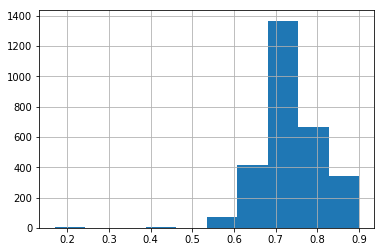

In [24]:
%matplotlib inline
results['f1_real'].hist()

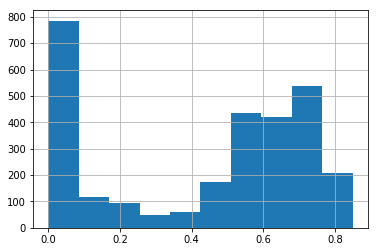

In [102]:
%matplotlib inline
results['f1_fake'].hist()

In [25]:
results.nlargest(5, ['roc']) 

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
1956,2-0-1 char-word-func,2,0,1,1848,tfidf,RandomForestClassifier,0.66,0.62,0.86,0.34,0.74,0.69,0.96,0.55,0.81
156,2-2-2 char-word-func,2,2,2,11448,binary,RandomForestClassifier,0.63,0.59,0.88,0.28,0.72,0.67,0.95,0.52,0.80
204,2-1-0 char-word-func,2,1,0,5575,binary,RandomForestClassifier,0.64,0.60,0.89,0.30,0.74,0.69,0.95,0.55,0.81
252,2-0-1 char-word-func,2,0,1,1848,binary,RandomForestClassifier,0.66,0.62,0.88,0.33,0.74,0.69,0.95,0.55,0.81
488,2-0-0 char-word-func,2,0,0,1555,logent,LogisticRegression,0.55,0.50,0.88,0.00,0.57,0.50,0.95,0.00,0.73


We already notice that 2 - 0 - 1 , 2 - 0 -0 , or 2 - 1 -0 are teh best o the Cross-Validation runs. Will this hold for tests? (actually, for test never mind, the function didn't apply there - then check the F-scores, whether they stay high  for  CV and Test runs. If they are sufficiently high (show up in top5, top 10), then we are on a good track).   


Note that the 1st column is the # of the line in the result table and can be tretaed as the ID of an experiment 

In [26]:
#This will show us the performence of both and give us all results above 0.70
best = results[results[['f1_fake','cv-f1-fake']]>0.70]


# this code will show us top 5 results of those who have f1 score above 0.70
best.nlargest(5,['f1_fake','cv-f1-fake'])

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,0.84,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,0.85,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,0.85,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN,0.84,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN,0.84,NaN


This show us that meximum score of "f1_fake" =  0.85 and Meximum score of "cv-f1-fake" = 0.78

Now, lets further investigate at what N-Gram, Weighting schemes are giving this results

In [27]:
# analysis = results.loc[[201, 1967, 1983, 1007, 1023 ]]
# print(analysis)

In [28]:
#This will show us the performence of both and give us all results above 0.70
good = results[results[['f1_fake','f1_real']]>0.70]


# this code will show us top 5 results of those who have f1 score above 0.70
good.nlargest(5,['f1_fake','f1_real'])

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,0.89
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,0.89
1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,0.89
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,0.89
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0.89


This show us that meximum score of "f1_fake" =  0.85 and Meximum score of "f1_fake" = 0.89

Now, lets further investigate at what N-Gram, Weighting schemes are giving this results

In [29]:
# New_analysis = results.loc[[201, 1007, 1015, 1023, 1967 ]]
# print(New_analysis)

The code below provides us illustration about what N-Gram, Weighting schemes are giving above results results

In [30]:
#This will show us the performence of both and give us all results above 0.70
good = results[results[['N-gram-feat-comb','classifier','weight scheme', 'cv-roc','roc', 'cv-f1-fake','f1_fake','f1_real']]>0.70]


# this code will show us top 5 results of those who have f1 score above 0.70
good.nlargest(5,['cv-f1-fake','f1_fake','f1_real'])


,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
202,2-1-0 char-word-func,NaN,NaN,NaN,NaN,binary,SVC,NaN,NaN,0.90,0.79,NaN,NaN,NaN,0.81,0.88
207,2-1-0 char-word-func,NaN,NaN,NaN,NaN,binary,AdaBoostClassifier,NaN,NaN,0.90,0.79,NaN,NaN,0.92,0.81,0.87
215,3-1-0 char-word-func,NaN,NaN,NaN,NaN,binary,AdaBoostClassifier,NaN,NaN,0.87,0.79,NaN,NaN,0.90,0.82,0.88
250,2-0-1 char-word-func,NaN,NaN,NaN,NaN,binary,SVC,NaN,NaN,0.91,0.82,NaN,NaN,NaN,0.80,0.87
10,2-0-0 char-word-func,NaN,NaN,NaN,NaN,binary,SVC,NaN,NaN,0.90,0.80,NaN,NaN,NaN,0.81,0.88


The results show that the following:

* Best N-gram size: 
                   ** Charater level binary gram and tri-gram 
                   ** Word level unigram
                   ** combinations of Character level and Word level bi-gram and uni-gram 
                      respectively

* Best Weighting Schmes: 
                   ** Binary and Norm weighting schemes provide outstanding results
                   
* Best Classifiers: 
                   ** Highest score achieved by SVC
                   ** Second highest score acchieved by AdaBoostClassifier



In [31]:
#This will show us the performence of both and give us all results above 0.70
good = results[results[['N-gram-feat-comb','classifier','weight scheme', 'cv-roc','roc', 'cv-f1-fake','f1_fake','f1_real']]>0.70]


# this code will show us top 5 results of those who have f1 score above 0.70
good.nlargest(5,[ 'cv-roc','roc', 'cv-f1-fake','f1_fake','f1_real'])

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
248,2-0-1 char-word-func,NaN,NaN,NaN,NaN,binary,LogisticRegression,NaN,NaN,0.9,0.79,NaN,NaN,0.94,0.80,0.87
207,2-1-0 char-word-func,NaN,NaN,NaN,NaN,binary,AdaBoostClassifier,NaN,NaN,0.9,0.79,NaN,NaN,0.92,0.81,0.87


In [32]:
# classifiers having accuracy more than 75% AND weighting Scheme
print(results[(results.classifier == 'AdaBoostClassifier')| 
              (results.classifier == 'SVC')
              & (results['weight scheme'] == 'binary')
              & (results['cv-f1-fake'] <80) & (results['f1_fake'] <80)
              & (results['f1_real'] <80) & (results.roc <75)].head(10))


        N-gram-feat-comb  char N-gram  word N-gram  func N-gram  \
2   1-0-0 char-word-func            1            0            0   
7   1-0-0 char-word-func            1            0            0   
10  2-0-0 char-word-func            2            0            0   
15  2-0-0 char-word-func            2            0            0   
18  3-0-0 char-word-func            3            0            0   
23  3-0-0 char-word-func            3            0            0   
26  4-0-0 char-word-func            4            0            0   
31  4-0-0 char-word-func            4            0            0   
34  5-0-0 char-word-func            5            0            0   
39  5-0-0 char-word-func            5            0            0   

    total_feat_num weight scheme          classifier  cv-acc  cv-balanced_acc  \
2              101        binary                 SVC    0.67             0.64   
7              101        binary  AdaBoostClassifier    0.70             0.69   
10            1555 

In [33]:
# classifiers having accuracy more than 75% AND weighting Scheme
print(results[(results.classifier == 'AdaBoostClassifier')
              & (results['weight scheme'] == 'binary')
              & (results['cv-f1-fake'] <80) & (results['f1_fake'] <80)
              & (results['f1_real'] <80) & (results.roc <75)].head(10))

        N-gram-feat-comb  char N-gram  word N-gram  func N-gram  \
7   1-0-0 char-word-func            1            0            0   
15  2-0-0 char-word-func            2            0            0   
23  3-0-0 char-word-func            3            0            0   
31  4-0-0 char-word-func            4            0            0   
39  5-0-0 char-word-func            5            0            0   
47  6-0-0 char-word-func            6            0            0   
55  0-1-0 char-word-func            0            1            0   
63  0-2-0 char-word-func            0            2            0   
71  0-3-0 char-word-func            0            3            0   
79  0-4-0 char-word-func            0            4            0   

    total_feat_num weight scheme          classifier  cv-acc  cv-balanced_acc  \
7              101        binary  AdaBoostClassifier    0.70             0.69   
15            1555        binary  AdaBoostClassifier    0.81             0.80   
23            7927 

In [34]:
# classifiers having accuracy more than 75% AND weighting Scheme
print(results[(results.classifier == 'AdaBoostClassifier')
              | (results['weight scheme'] == 'binary')
              | (results['cv-f1-fake'] >80) & (results['f1_fake'] >80)
              | (results['f1_real'] >80) & (results.roc >80)].head(10))

       N-gram-feat-comb  char N-gram  word N-gram  func N-gram  \
0  1-0-0 char-word-func            1            0            0   
1  1-0-0 char-word-func            1            0            0   
2  1-0-0 char-word-func            1            0            0   
3  1-0-0 char-word-func            1            0            0   
4  1-0-0 char-word-func            1            0            0   
5  1-0-0 char-word-func            1            0            0   
6  1-0-0 char-word-func            1            0            0   
7  1-0-0 char-word-func            1            0            0   
8  2-0-0 char-word-func            2            0            0   
9  2-0-0 char-word-func            2            0            0   

   total_feat_num weight scheme              classifier  cv-acc  \
0             101        binary      LogisticRegression    0.66   
1             101        binary               LinearSVC    0.73   
2             101        binary                     SVC    0.67   
3    

### Now lets create a filter

In [35]:
m = (results.classifier == 'AdaBoostClassifier') & (results['weight scheme'] == 'binary') # create a filter mask

In [36]:
m.value_counts() # it's just a boolean series

False    2820
True       60
dtype: int64

In [37]:
plot = results[m][['classifier', 'weight scheme', 'N-gram-feat-comb', 'cv-acc','acc', 'roc', 'f1_real','f1_fake']].sort_values(['cv-acc', 'acc','roc' , 'f1_real','f1_fake'], ascending=[False, False,False,False, False]).head(100)
plot

,classifier,weight scheme,N-gram-feat-comb,cv-acc,acc,roc,f1_real,f1_fake
207,AdaBoostClassifier,binary,2-1-0 char-word-func,0.81,0.85,0.92,0.87,0.81
15,AdaBoostClassifier,binary,2-0-0 char-word-func,0.81,0.84,0.92,0.86,0.80
255,AdaBoostClassifier,binary,2-0-1 char-word-func,0.80,0.85,0.92,0.87,0.82
215,AdaBoostClassifier,binary,3-1-0 char-word-func,0.80,0.85,0.90,0.88,0.82
159,AdaBoostClassifier,binary,2-2-2 char-word-func,0.79,0.86,0.93,0.89,0.82
167,AdaBoostClassifier,binary,3-3-3 char-word-func,0.79,0.83,0.90,0.86,0.79
303,AdaBoostClassifier,binary,1-2-0 char-word-func,0.79,0.80,0.87,0.84,0.75
263,AdaBoostClassifier,binary,3-0-1 char-word-func,0.78,0.86,0.91,0.88,0.82
23,AdaBoostClassifier,binary,3-0-0 char-word-func,0.77,0.83,0.90,0.86,0.78
151,AdaBoostClassifier,binary,1-1-1 char-word-func,0.77,0.81,0.90,0.85,0.76


Overall results Based on the four parameters, the following conclusions can be made:
    
* Best N-gram size: 
                   ** Charater level binary gram 
                   ** Combination of Charater level binary gram and Word level unigram

* Best Weighting Schme: 
                   ** Binary 
                   
* Best Classifier: 
                   ** AdaBoostClassifier
    

### Finding Maximum CV-ROC by weight scheme

In [38]:
# https://stackoverflow.com/questions/30880511/pandas-groupby-category-rating-get-top-value-from-each-category
results.loc[results.groupby('weight scheme')["cv-roc"].agg('idxmax')]

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weight scheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
249,2-0-1 char-word-func,2,0,1,1848,binary,LinearSVC,0.82,0.82,0.91,0.81,0.84,0.84,0.00,0.81,0.87
730,2-0-1 char-word-func,2,0,1,1848,logent,SVC,0.55,0.50,0.90,0.00,0.57,0.50,0.00,0.00,0.73
1599,2-2-2 char-word-func,2,2,2,11448,none (tf),AdaBoostClassifier,0.81,0.80,0.89,0.78,0.85,0.84,0.93,0.82,0.88
1583,2-2-2 char-word-func,2,2,2,11448,norm,AdaBoostClassifier,0.81,0.80,0.89,0.78,0.85,0.84,0.93,0.82,0.88
1943,1-0-1 char-word-func,1,0,1,394,relat,AdaBoostClassifier,0.75,0.75,0.83,0.74,0.85,0.84,0.93,0.81,0.87
996,2-0-0 char-word-func,2,0,0,1555,tfidf,RandomForestClassifier,0.66,0.62,0.87,0.34,0.74,0.70,0.94,0.56,0.82


### Plotting

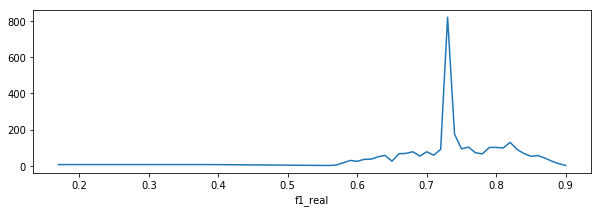

In [39]:
results.groupby(['f1_real']).size().plot(figsize=(10,3))

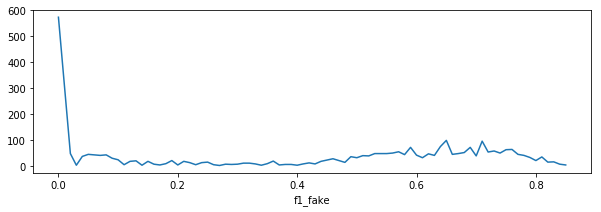

In [40]:
results.groupby(['f1_fake']).size().plot(figsize=(10,3))

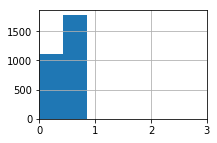

In [41]:
#### Distribution 
import matplotlib.pyplot as plt
results.f1_fake.hist(figsize=(3,2), bins=2)
plt.xlim(0, 3);

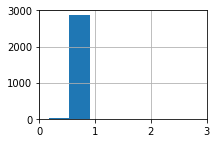

In [42]:
#### Distribution 
import matplotlib.pyplot as plt
results.f1_real.hist(figsize=(3,2), bins=2)
plt.xlim(0, 3);

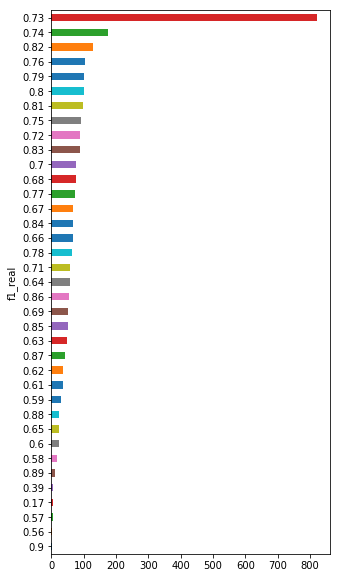

In [43]:
plt.figure(figsize=(5, 10))
results.groupby('f1_real').size().sort_values().plot(kind='barh')

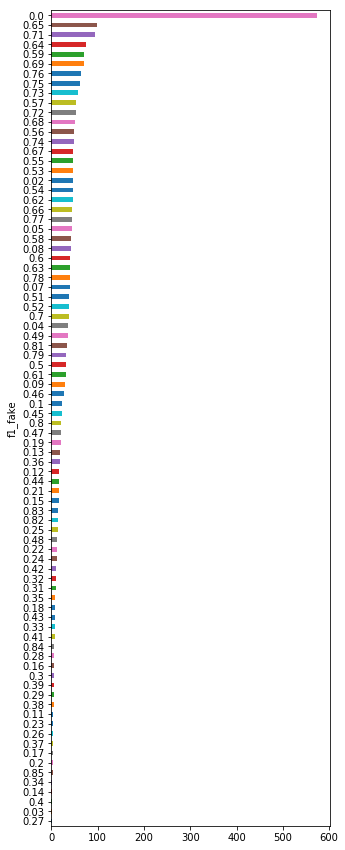

In [44]:
plt.figure(figsize=(5, 15))
results.groupby('f1_fake').size().sort_values().plot(kind='barh')

In [45]:
results.columns

Index(['N-gram-feat-comb', 'char N-gram', 'word N-gram', 'func N-gram',
       'total_feat_num', 'weight scheme', 'classifier', 'cv-acc',
       'cv-balanced_acc', 'cv-roc', 'cv-f1-fake', 'acc', 'balanced_acc', 'roc',
       'f1_fake', 'f1_real'],
      dtype='object')

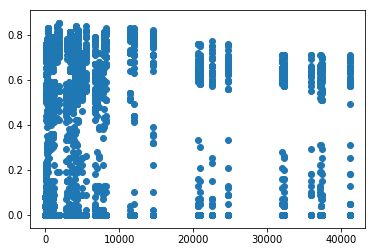

In [48]:
plt.scatter(results['total_feat_num'], results['f1_fake'])


In [45]:
results.groupby('total_feat_num')['f1_fake'].max()

total_feat_num
18       0.08
85       0.62
101      0.76
119      0.76
136      0.23
186      0.77
237      0.78
248      0.62
293      0.58
349      0.77
378      0.59
394      0.83
541      0.59
847      0.52
948      0.77
1020     0.52
1121     0.79
1140     0.59
1555     0.84
1848     0.85
2860     0.58
2961     0.78
3153     0.58
3203     0.59
3304     0.81
3790     0.58
3891     0.78
4020     0.71
4038     0.71
4121     0.84
4156     0.72
4313     0.70
4414     0.82
5040     0.72
5575     0.84
6690     0.64
6791     0.79
6983     0.64
7223     0.72
7810     0.72
7927     0.81
8220     0.83
11448    0.83
11947    0.83
14577    0.82
20681    0.76
20974    0.76
22548    0.77
24701    0.76
31926    0.71
32219    0.71
32310    0.71
35946    0.71
37105    0.71
37208    0.71
37398    0.70
41125    0.71
Name: f1_fake, dtype: float64

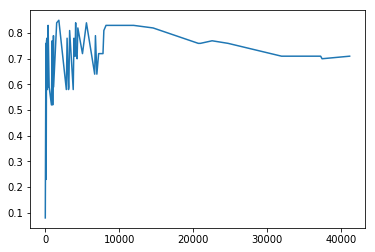

In [49]:
plt.plot(results.groupby('total_feat_num')['f1_fake'].max())

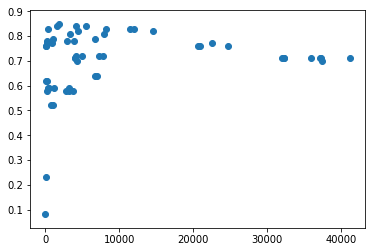

In [50]:

plt.scatter(results.groupby('total_feat_num')['f1_fake'].max().index, results.groupby('total_feat_num')['f1_fake'].max())

In [51]:
results.columns

Index(['N-gram-feat-comb', 'char N-gram', 'word N-gram', 'func N-gram',
       'total_feat_num', 'weight scheme', 'classifier', 'cv-acc',
       'cv-balanced_acc', 'cv-roc', 'cv-f1-fake', 'acc', 'balanced_acc', 'roc',
       'f1_fake', 'f1_real'],
      dtype='object')

In [52]:
results['weight scheme'].value_counts()

relat        480
none (tf)    480
tfidf        480
binary       480
logent       480
norm         480
Name: weight scheme, dtype: int64

#### Plotting Analysis of Feature N-gram Sizes  (!!! REWORK IN 1 PLOT)

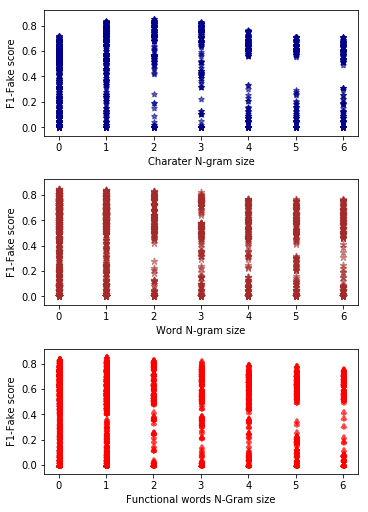

In [140]:
from matplotlib import pyplot as plt 

figure, ax = plt.subplots(ncols=1, nrows=3, figsize=(5, 7), constrained_layout=True)


ax[0].scatter(results['char N-gram'], results['f1_fake'], alpha=0.6, color='darkblue', marker=(5, 1))
ax[0].set_xlabel('Charater N-gram size')
ax[0].set_ylabel('F1-Fake score')



ax[1].scatter(results['word N-gram'], results['f1_fake'], alpha=0.6, color='brown', marker=(5, 2))
ax[1].set_xlabel('Word N-gram size')
ax[1].set_ylabel('F1-Fake score')


ax[2].scatter(results['func N-gram'], results['f1_fake'], alpha=0.6, color='red', marker=r'$\clubsuit$')
ax[2].set_xlabel('Functional words N-Gram size')
ax[2].set_ylabel('F1-Fake score')

figure.savefig('Ngram.png')

#### Plotting Analysis of Weighting Schemes

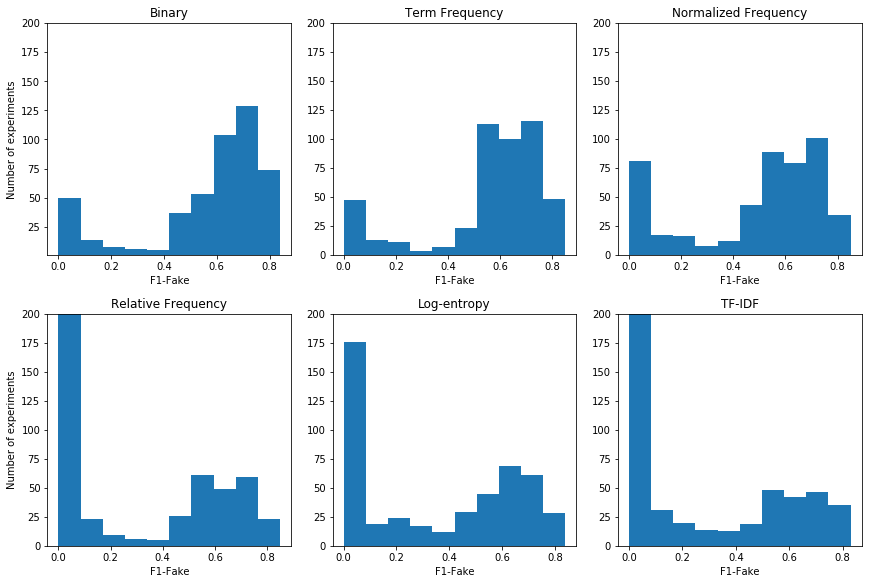

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

figure, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 8), constrained_layout=True)

ax[0][0].hist(results[results['weight scheme'] == 'binary']['f1_fake'])
ax[0][0].set_title('Binary'), ax[0][0].set_ylim(1, 200)
ax[0][0].set_ylabel('Number of experiments')
ax[0][0].set_xlabel('F1-Fake')

ax[0][1].hist(results[results['weight scheme'] == 'none (tf)']['f1_fake'])
ax[0][1].set_ybound(lower=0, upper=200)
ax[0][1].set_title('Term Frequency')
ax[0][1].set_xlabel('F1-Fake')

ax[0][2].hist(results[results['weight scheme'] == 'norm']['f1_fake'])
ax[0][2].set_ybound(lower=0, upper=200)
ax[0][2].set_title('Normalized Frequency')
ax[0][2].set_xlabel('F1-Fake')

ax[1][0].hist(results[results['weight scheme'] == 'relat']['f1_fake'])
ax[1][0].set_ylabel('Number of experiments')
ax[1][0].set_ybound(lower=0, upper=200)
ax[1][0].set_title('Relative Frequency')
ax[1][0].set_xlabel('F1-Fake')


ax[1][1].hist(results[results['weight scheme'] == 'logent']['f1_fake'])
ax[1][1].set_ybound(lower=0, upper=200)
ax[1][1].set_title('Log-entropy')
ax[1][1].set_xlabel('F1-Fake')

ax[1][2].hist(results[results['weight scheme'] == 'tfidf']['f1_fake'])
ax[1][2].set_ybound(lower=0, upper=200)
ax[1][2].set_title('TF-IDF')
ax[1][2].set_xlabel('F1-Fake')
figure.savefig('weight.png')

#### Plotting Analysis of Classifiers!!!

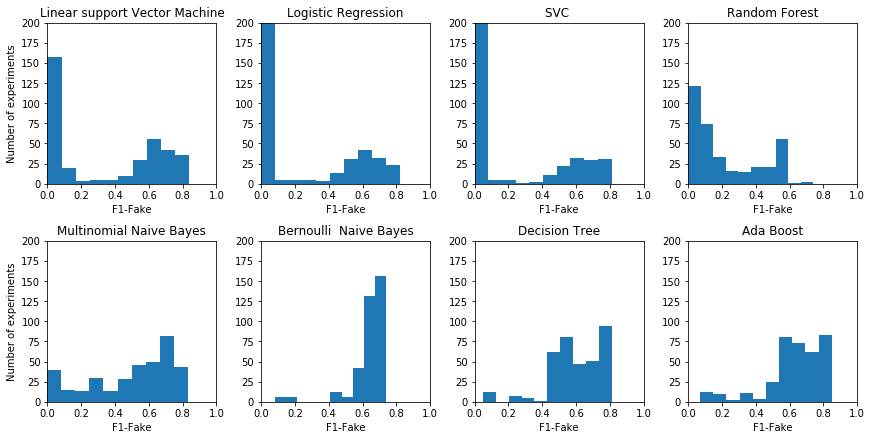

In [156]:
 # add  similar analysis for classifiers

from matplotlib import pyplot as plt
figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(12, 6), constrained_layout=True)

ax[0][0].hist(results[results['classifier'] == 'LinearSVC']['f1_fake'])
ax[0][0].set_ybound(lower=0, upper=200)
ax[0][0].set_xbound(lower=0.0, upper=1.0)
ax[0][0].set_title('Linear support Vector Machine')
ax[0][0].set_ylabel('Number of experiments')
ax[0][0].set_xlabel('F1-Fake')


ax[0][1].hist(results[results['classifier'] == 'LogisticRegression']['f1_fake'])
ax[0][1].set_ybound(lower=0, upper=200)
ax[0][1].set_xbound(lower=0.0, upper=1.0)
ax[0][1].set_title('Logistic Regression')
ax[0][1].set_xlabel('F1-Fake')

ax[0][2].hist(results[results['classifier'] == 'SVC']['f1_fake'])
ax[0][2].set_ybound(lower=0, upper=200)
ax[0][2].set_xbound(lower=0.0, upper=1.0)
ax[0][2].set_title('SVC ')
ax[0][2].set_xlabel('F1-Fake')

ax[0][3].hist(results[results['classifier'] == 'RandomForestClassifier']['f1_fake'])
ax[0][3].set_ybound(lower=0, upper=200)
ax[0][3].set_xbound(lower=0.0, upper=1.0)
ax[0][3].set_title('Random Forest')
ax[0][3].set_xlabel('F1-Fake')


ax[1][0].hist(results[results['classifier'] == 'MultinomialNB']['f1_fake'])
ax[1][0].set_ybound(lower=0, upper=200)
ax[1][0].set_xbound(lower=0.0, upper=1.0)
ax[1][0].set_title('Multinomial Naive Bayes')
ax[1][0].set_ylabel('Number of experiments')
ax[1][0].set_xlabel('F1-Fake')

ax[1][1].hist(results[results['classifier'] == 'BernoulliNB']['f1_fake'])
ax[1][1].set_ybound(lower=0, upper=200)
ax[1][1].set_xbound(lower=0.0, upper=1.0)
ax[1][1].set_title('Bernoulli  Naive Bayes')
ax[1][1].set_xlabel('F1-Fake')


ax[1][2].hist(results[results['classifier'] == 'DecisionTreeClassifier']['f1_fake'])
ax[1][2].set_ybound(lower=0, upper=200)
ax[1][2].set_xbound(lower=0.0, upper=1.0)
ax[1][2].set_title('Decision Tree')
ax[1][2].set_xlabel('F1-Fake')

ax[1][3].hist(results[results['classifier'] == 'AdaBoostClassifier']['f1_fake'])
ax[1][3].set_ybound(lower=0, upper=200)
ax[1][3].set_xbound(lower=0.0, upper=1.0)
ax[1][3].set_title('Ada Boost')
ax[1][3].set_xlabel('F1-Fake')



figure.savefig('weight.png')

### ROC-curve plots

#### RUN FROM HERE TO CREATE ROC PLOTS

In [4]:
import json 

y_proba = json.load(open('results/y_probabilities_for_roccurve.json'))
y_proba.keys()

dict_keys(['test_y', '1007', '1015', '1023', '1967', '1975', '201', '159', '775', '247', '1801'])

In [5]:
test_y = y_proba['test_y']

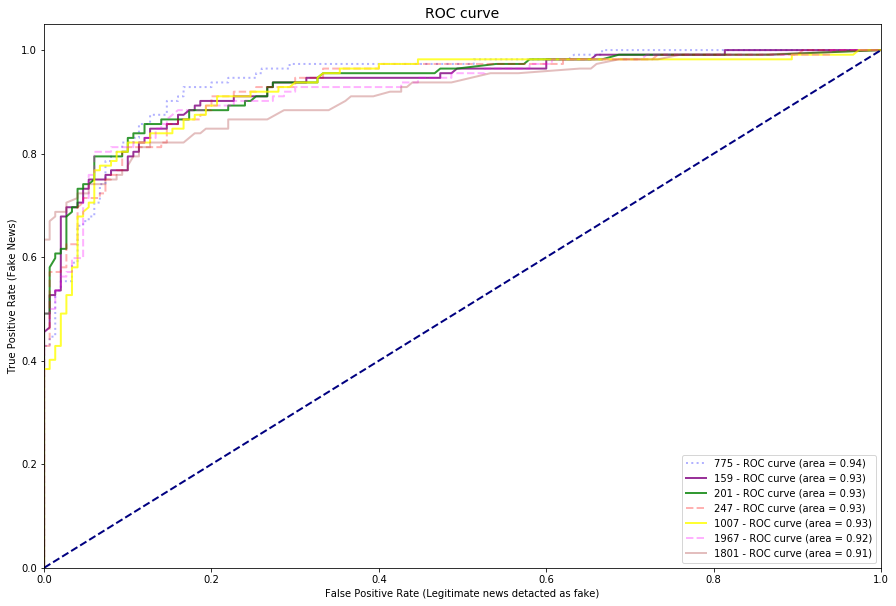

In [7]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#roc_auc_score(y_test, y_pred_scores[:, 1])

plt.figure(figsize=[15,10])
lw = 2


# 775
fpr, tpr, thresholds = roc_curve(test_y, y_proba['775'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='1-1-0-binary-' % roc_auc, alpha=0.3, linestyle=':')

# 159
fpr, tpr, thresholds = roc_curve(test_y, y_proba['159'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y, y_proba['159'])

# !!! PLS, RENAME THE LEGEND: smth short but menaingful for the reader, they won't understand experiment IDs
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='159 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.8)

# 201    
fpr, tpr, thresholds = roc_curve(test_y, y_proba['201'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y, y_proba['201'])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='201 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.8)


# 247
fpr, tpr, thresholds = roc_curve(test_y, y_proba['247'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=lw, label='247 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.3, linestyle='--')


# 1007
fpr, tpr, thresholds = roc_curve(test_y, y_proba['1007'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='1007 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.8)
  
        
# 1967
fpr, tpr, thresholds = roc_curve(test_y, y_proba['1967'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='magenta',
         lw=lw, label='1967 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.3, linestyle='--')
    


# 1801
fpr, tpr, thresholds = roc_curve(test_y, y_proba['1801'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='brown',
         lw=lw, label='1801 - ROC curve (area = %0.2f)' % roc_auc, alpha=0.3)      
    
    
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Legitimate news detacted as fake)')
plt.ylabel('True Positive Rate (Fake News)')
plt.title('ROC curve', size=14)
plt.legend(loc="lower right")
#plt.show()

plt.savefig('figures/ROC-curves.png', dpi=300)



